<a href="https://colab.research.google.com/github/JDNOV/SERIES_TEMPORALES/blob/main/Copia_de_AST_Clase_1_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

Importamos modulos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/Index2018.csv'
raw_csv_data = pd.read_csv(url)
df_comp=raw_csv_data.copy()

#### Breve resumen del dataset


Promedio general de los datos:

In [ ]:
df_comp.spx.mean()

1288.6425471322289

Visualizo las primeras 10 filas de la tabla "df_comp" con la que voy a trabajar. Veo que tiene 5 atributos: date, spx. dax. ftse. nikkei.
En el campo DATE se puede observar que se registraron los valores de los dias habiles.



In [ ]:
df_comp.head(10)

,date,spx,dax,ftse,nikkei
0,7/1/1994,469.90,2224.95,3445.98,18124.01
1,10/1/1994,475.27,2225.00,3440.58,18443.44
2,11/1/1994,474.13,2228.10,3413.77,18485.25
3,12/1/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
5,14/01/1994,474.91,2151.05,3400.56,18973.70
6,17/01/1994,473.30,2115.56,3407.83,18725.37
7,18/01/1994,474.25,2130.35,3437.01,18514.55
8,19/01/1994,474.30,2132.52,3475.15,19039.40
9,20/01/1994,474.98,2098.36,3469.99,19183.92


In [ ]:
df_comp.date.describe()

count         6277
unique        6277
top       7/1/1994
freq             1
Name: date, dtype: object

El tipo de los datos es FLOAT, salvo el campo DATE que es un objeto.

In [ ]:
df_comp.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

## **Adaptamos el dataset para trabajarlo segun sus series temporales.**
#### Este paso es fundamental. El campo día tiene que ser del tipo datetime y no object


df_comp.date → llamo a la columna *date* del df *df_comp*. Con *pd.to_datetime* llamo a la formula de la libreria pandas.

In [ ]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [ ]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df_comp.date.describe()

count                    6277
unique                   6277
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

Valido que el tipo del atributo *date* haya quedado como *datetime*

In [ ]:
df_comp.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

## **Seteamos como index del dataset segun el dia.**
#### Esto se hace, porque los modelos que se aplican requiere que la fecha este configurada como index.

In [ ]:
df_comp.set_index("date", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## **Es importante chequear que no haya valores faltantes**

*   Elemento de lista
*   Elemento de lista


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

- h: por hora
- w: semanal
- d: diario
- m: mensual
- b: dias laborables



Como los datos fueron guardados los dias habiles, si la frecuencia que utilizo es "d", me va a traer valores faltantes en los dias sabados y domingos.

In [ ]:
df_comp=df_comp.asfreq('d')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


Si uso "b" me trae solo los dias habiles.

In [ ]:
df_comp=df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


Chequeo valores faltantes:

In [ ]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [ ]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## **Graficamos la serie temporal**

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

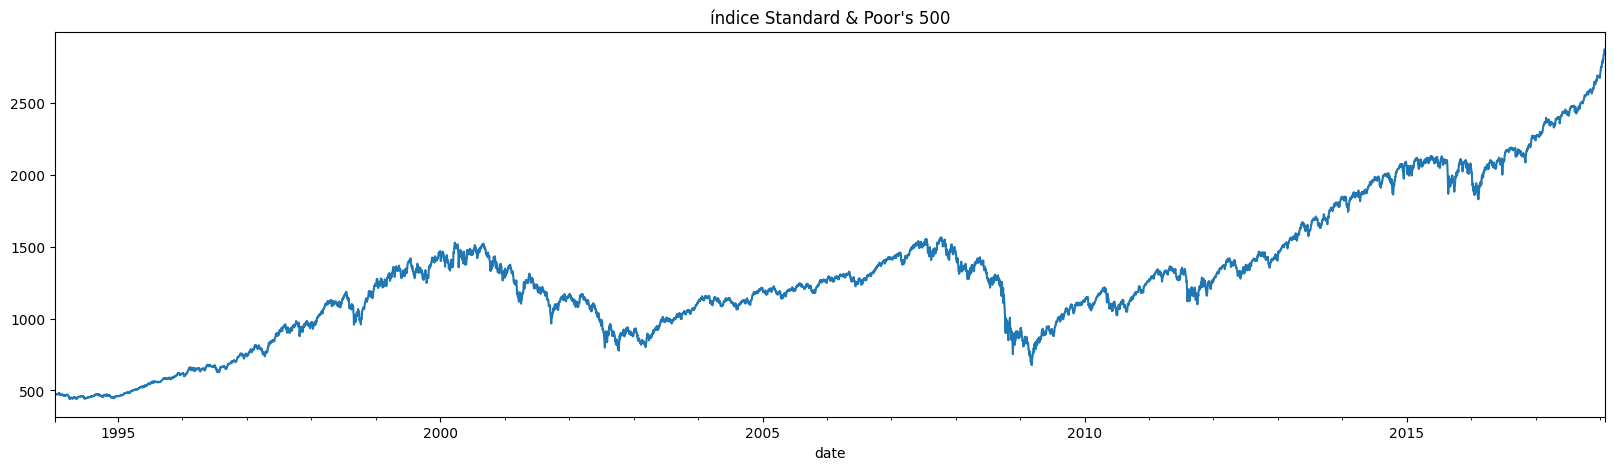

In [ ]:
df_comp.spx.plot(figsize=(20,5), title = "índice Standard & Poor's 500")
plt.show()

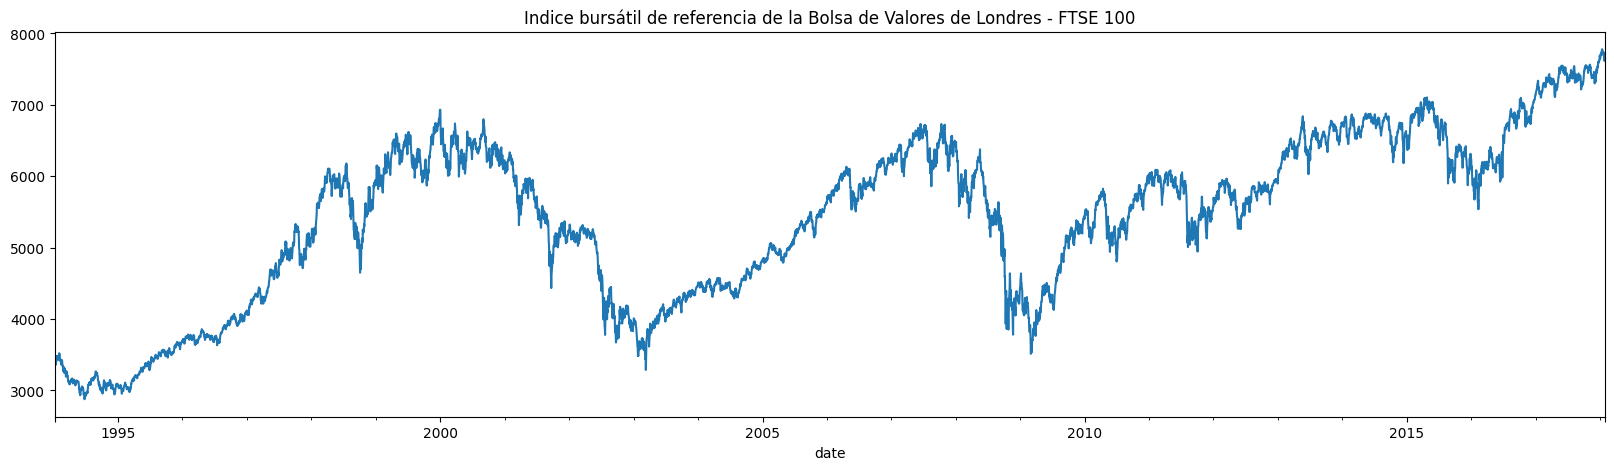

In [ ]:
df_comp.ftse.plot(figsize=(20,5), title = "Indice bursátil de referencia de la Bolsa de Valores de Londres - FTSE 100")
plt.show()

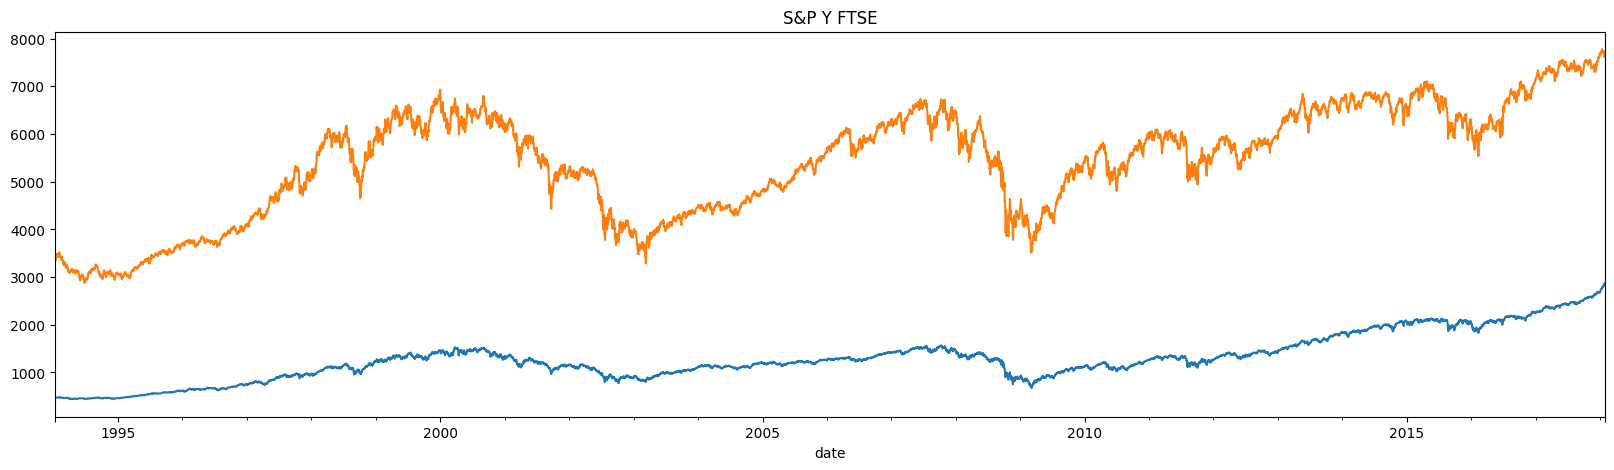

In [ ]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.title("S&P Y FTSE")
plt.show()



---



---


## **Descomposición de Series Temporales**



#### En la descomposición se puede observar:

**Tendencia (T):** Representa la tendencia general o la dirección de la serie a lo largo del tiempo. Es una línea recta que indica si la serie está aumentando, disminuyendo o permanece constante a lo largo del tiempo.

**Estacionalidad (S):** Representa patrones repetitivos o estacionales en la serie que ocurren en intervalos regulares, como estacionalidades mensuales, trimestrales o anuales. Estos patrones pueden ser representados como fluctuaciones alrededor de la línea de tendencia.

**Error (E):** Es la parte residual de la serie que no puede ser explicada por la tendencia ni por la estacionalidad. Incluye factores aleatorios y otras influencias no sistemáticas.

#### La descomposición puede ser **ADITIVA** o **MULTIPLICATIVA**


---



La principal diferencia entre estos enfoques radica en cómo se combinan los componentes.

1.   En la **descomposición aditiva**, los componentes se suman a la serie original.
2.   En la **descomposición multiplicativa**, los componentes se multiplican para formar la serie original.

---

La elección entre estos dos enfoques depende de la naturaleza de la serie de tiempo y cómo se comportan sus componentes.

1.   Las series de tiempo con variaciones estacionales y tendencias que aumentan de manera constante a menudo se ajustan mejor con una **descomposición aditiva**.
2.   Las series con variaciones estacionales que aumentan con el tiempo pueden beneficiarse de una **descomposición multiplicativa**.

#### Para descomponer la serie, se utiliza el paquete *statsmodels*


#### **Descomposicion Aditiva**

En primer lugar muestra el ciclo de la serie, luego la tendencia, la estacionalidad y por último los residuos.

#### X(t) = T(t) + S(t) + E(t)



In [ ]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

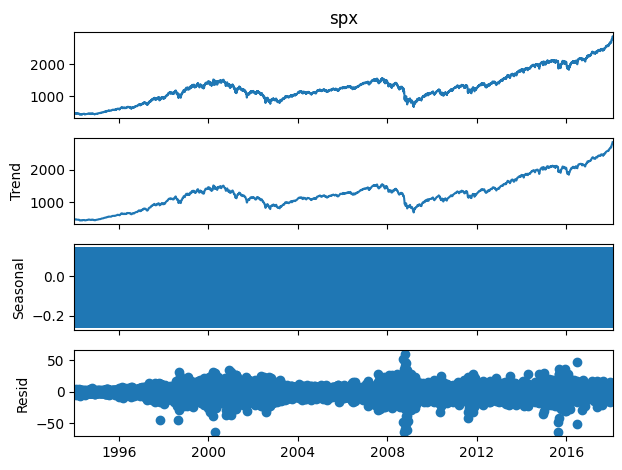

In [ ]:
s_dec_additive = seasonal_decompose(df_comp.spx, model = "adittive")
s_dec_additive.plot()
plt.show()

Si tiene *tendencia* o tiene *estacionalidad*, entonces la serie es *no estacionaria*. En el caso de ejemplo, atento a que tiene una franja ancha uniforme, muestra que no tiene *estacionalidad*, no obstante, en la segunda linea, se observa que tiene *tendencia*.


#### **Descomposicion Multiplicativa**


#### X(t) = T(t) x S(t) x E(t)


In [ ]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

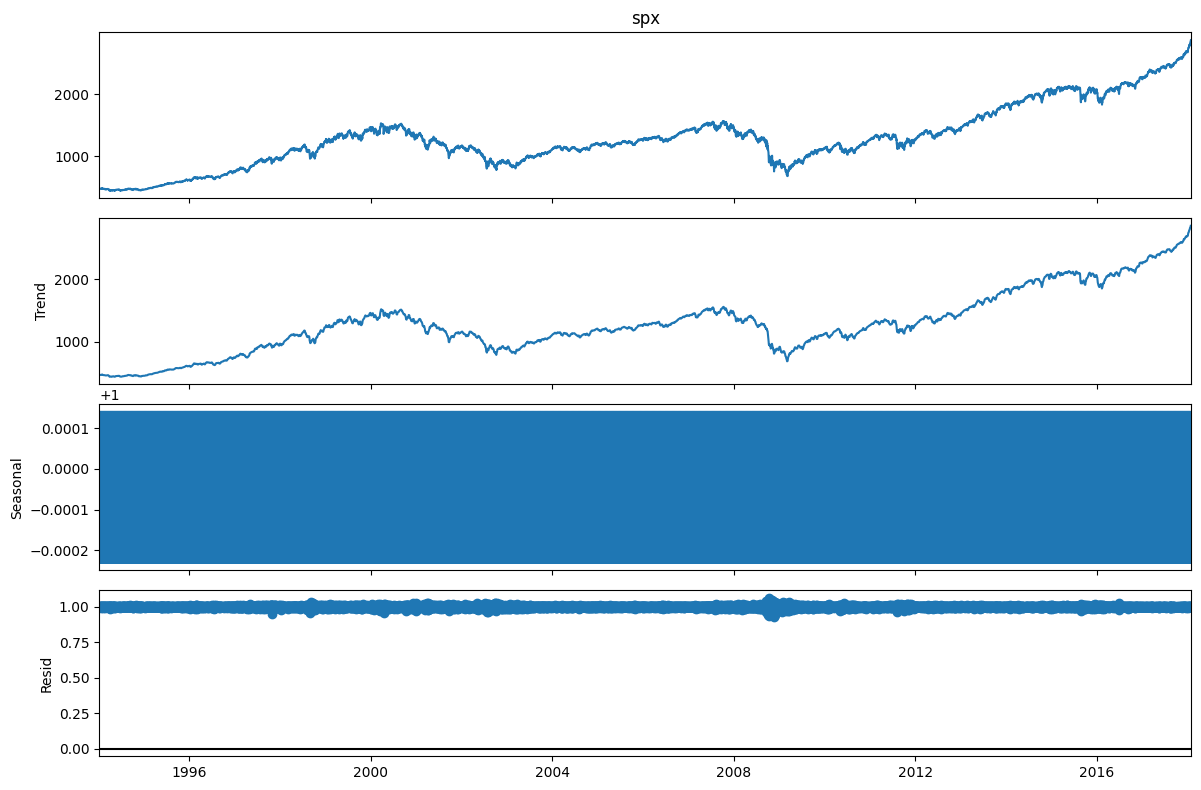

In [ ]:
s_dec_multiplicative = seasonal_decompose(df_comp.spx, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()




---


## **Representación gráfica de la Función de Autocorrelación**

In [ ]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [ ]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF del indice Standard & Poor's 500 (SPX)

El *CORRELOGRAMA* nos da una primera visualización acerca de si una serie es o no estacionaria.   Si se ve una caida, entonces la serie es no estacionaria. La sombra del correlograma es un area de confianza.

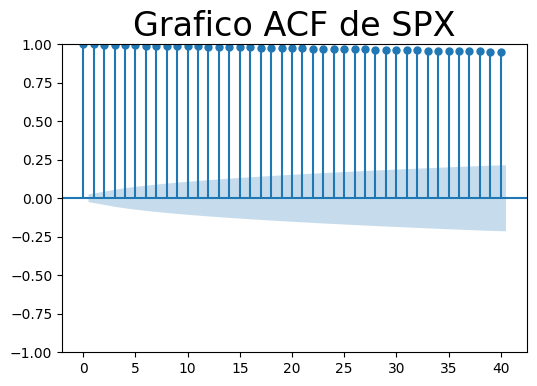

In [ ]:
plot_acf(df_comp.spx,lags=40)
plt.title("Grafico ACF de SPX", size= 24)
plt.show()

Grafico ACF del indice "DAX"

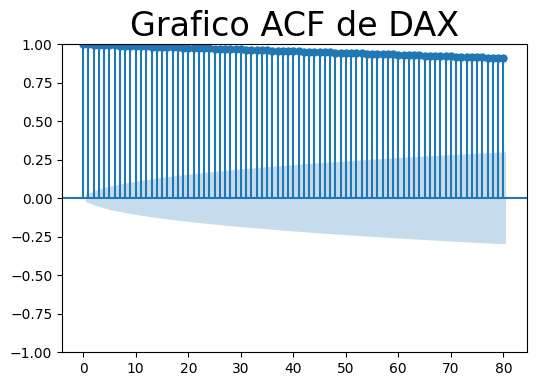

In [ ]:
plot_acf(df_comp.dax,lags=80)
plt.title("Grafico ACF de DAX", size= 24)
plt.show()

Grafico ACF del indice "ftse"

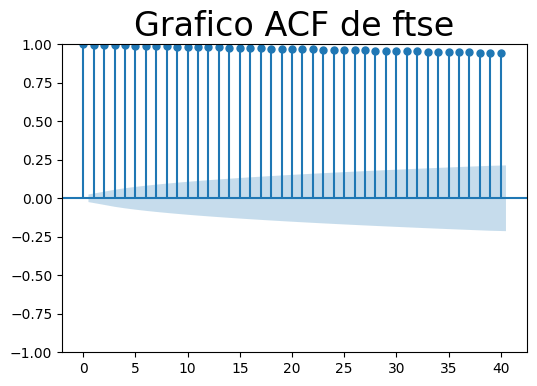

In [ ]:
plot_acf(df_comp.ftse,lags=40)
plt.title("Grafico ACF de ftse", size= 24)
plt.show()

Grafico ACF del indice "nikkei"

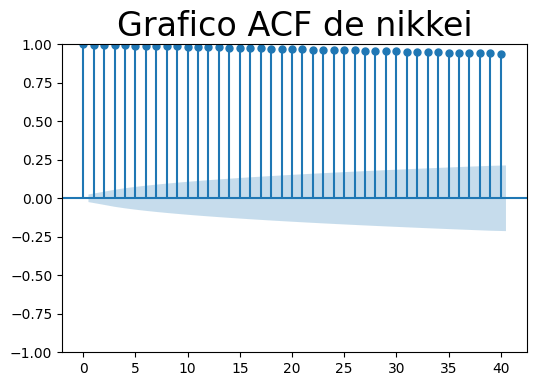

In [ ]:
plot_acf(df_comp.nikkei,lags=40)
plt.title("Grafico ACF de nikkei", size= 24)
plt.show()

#### **APLICAMOS UNA TRANSFORMACION DE LA SERIE**


#### La transformación de una serie de tiempo en sus primeras diferencias es una técnica común para mejorar la estacionariedad, eliminar tendencias y facilitar el análisis y la modelización de datos de series temporales.

#### La transformación de una serie de tiempo se realiza por varias razones en el análisis de series de tiempo:

**Estacionariedad:** Una serie de tiempo estacionaria es más fácil de modelar y analizar. La estacionariedad significa que las propiedades estadísticas de la serie (como la media y la varianza) son constantes a lo largo del tiempo.

**Eliminación de tendencia:**  Esto es útil cuando se sospecha que la serie tiene una tendencia creciente o decreciente, lo que dificultaría el análisis.

**Homogeneización de la varianza:** Si la varianza de una serie de tiempo no es constante a lo largo del tiempo (heterocedasticidad), las diferencias de primer orden pueden ayudar a estabilizar la varianza, lo que facilita el modelado.

**Reducción de la autocorrelación:** Las diferencias de primer orden también pueden reducir la autocorrelación en la serie de tiempo, lo que puede facilitar la identificación de modelos de series temporales adecuados, como modelos ARIMA (Media Móvil Integrada de Autoregresión).



---



In [ ]:
primera_diffs = df_comp.spx.values[1:]-df_comp.spx.values[:-1]
primera_diffs = np.concatenate([primera_diffs,[0]])

**df_comp.spx.values[1:]:** Esto toma los valores de la serie de tiempo df_comp.spx a partir del segundo valor en adelante. La indexación [1:] excluye el primer valor de la serie.

**df_comp.spx.values[:-1]:** Esto toma los valores de la serie de tiempo df_comp.spx hasta el penúltimo valor. La indexación [:-1] excluye el último valor de la serie.

La operación **df_comp.spx.values[1:]-df_comp.spx.values[:-1]** calcula la diferencia entre cada valor de la serie (a partir del segundo) y el valor anterior. Esto crea una nueva serie de tiempo que contiene las diferencias entre cada par de observaciones consecutivas en la serie original.

**np.concatenate([primera_diffs,[0]]):** Después de calcular las primeras diferencias, este código concatena un valor de 0 al final de la serie de diferencias. Esto es necesario para asegurarse de que la serie de diferencias tenga la misma longitud que la serie de tiempo original. Cuando calculas las diferencias, pierdes un valor al principio, por lo que se agrega un 0 al final para mantener la consistencia en la longitud de los datos.

In [ ]:
df_comp['primera_diffs_spx']=primera_diffs

In [ ]:
df_comp.head(10)

,spx,dax,ftse,nikkei,primera_diffs_spx
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,5.37
1994-01-10,475.27,2225.00,3440.58,18443.44,-1.14
1994-01-11,474.13,2228.10,3413.77,18485.25,0.04
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.70
1994-01-13,472.47,2142.37,3360.01,18577.26,2.44
1994-01-14,474.91,2151.05,3400.56,18973.70,-1.61
1994-01-17,473.30,2115.56,3407.83,18725.37,0.95
1994-01-18,474.25,2130.35,3437.01,18514.55,0.05
1994-01-19,474.30,2132.52,3475.15,19039.40,0.68


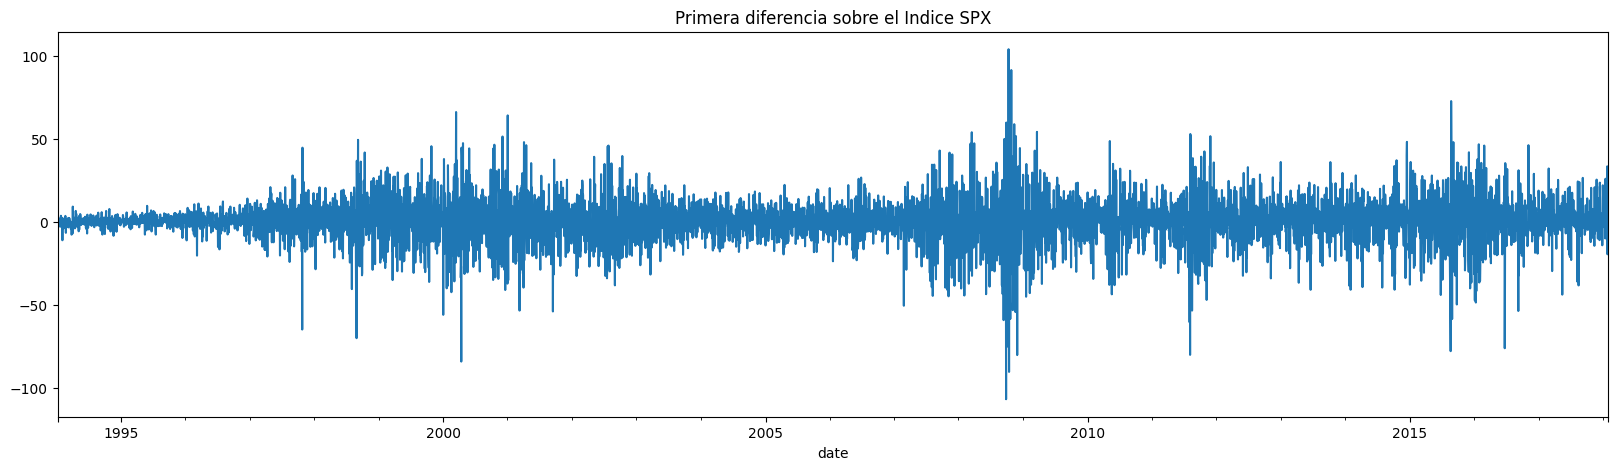

In [ ]:
#grafico este indice con las diferencias aplicadas fila a fila
df_comp.primera_diffs_spx.plot(figsize=(20,5), title = "Primera diferencia sobre el Indice SPX")
plt.show()

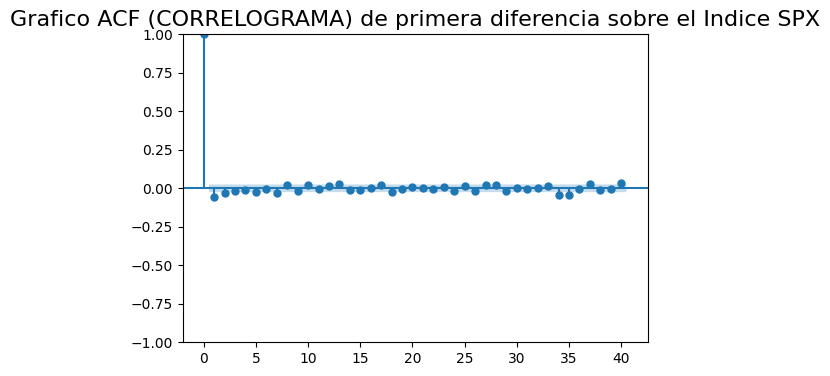

In [ ]:
plot_acf(df_comp.primera_diffs_spx,lags=40)
plt.title("Grafico ACF (CORRELOGRAMA) de primera diferencia sobre el Indice SPX", size= 16)
plt.show()

#### **Ruido Blanco:**
Simulamos un ruido blanco.

In [ ]:
wn = np.random.normal(loc = df_comp.spx.mean(), scale = df_comp.spx.std(), size = len(df_comp))
df_comp['wn'] = wn
df_comp.describe()

,spx,dax,ftse,nikkei,primera_diffs_spx,wn
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,0.379740,1290.584322
std,487.868210,2755.563853,1145.616719,4043.795272,13.552138,490.108194
min,438.920000,1911.700000,2876.600000,7054.980000,-106.621812,-715.373440
25%,992.715221,4070.460000,4486.730000,10701.130000,-5.194203,958.981594
50%,1233.761241,5774.260000,5663.300000,15030.510000,0.305038,1296.492508
75%,1460.250000,7445.560000,6304.630175,17860.470000,6.586405,1629.305675
max,2872.867839,13559.600000,7778.637689,24124.150000,104.136873,2972.729568


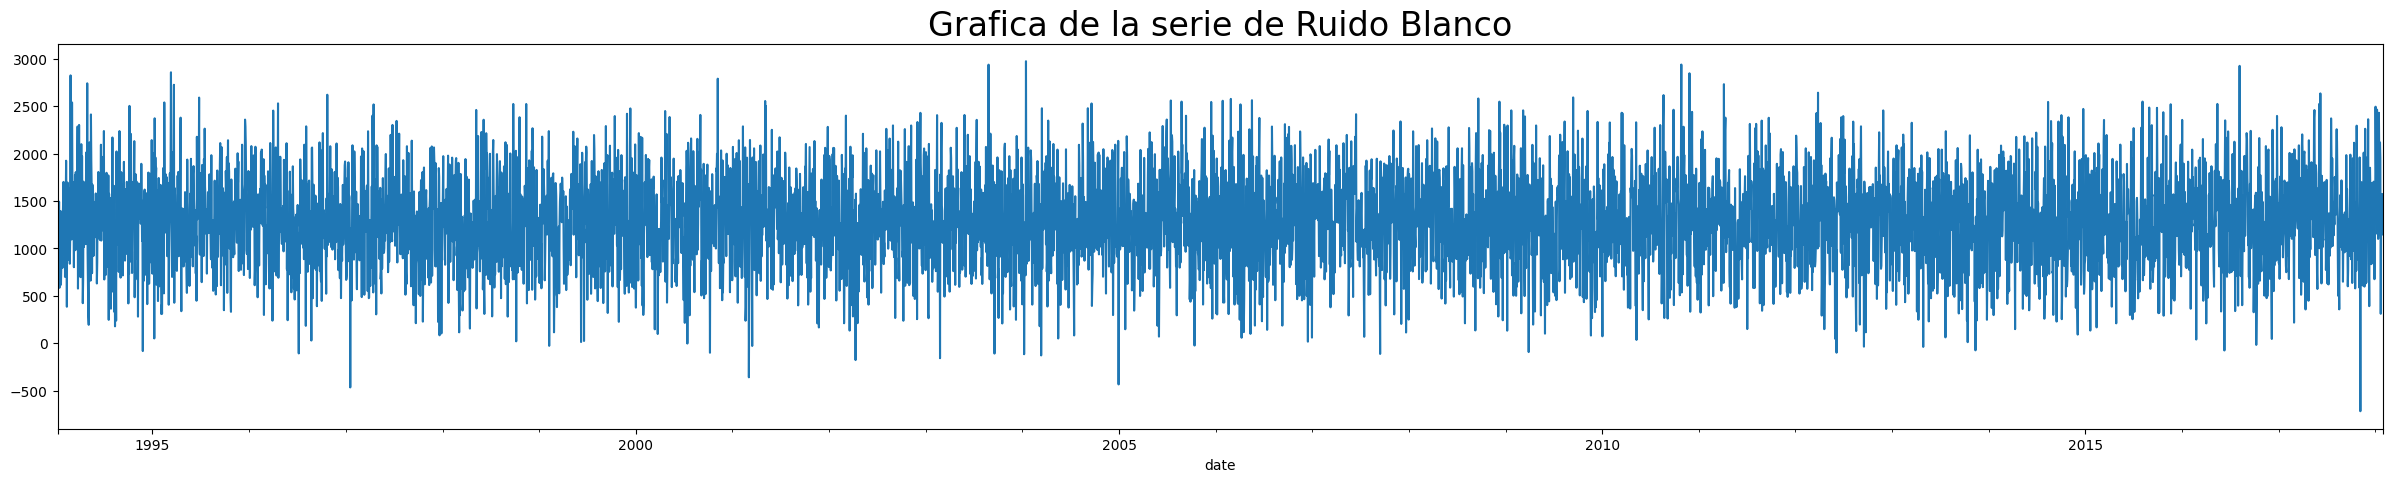

In [ ]:
df_comp.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco", size= 24)
plt.show()

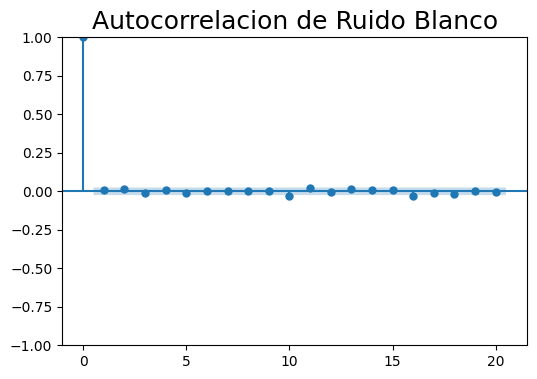

In [ ]:
plot_acf(df_comp.wn, lags=20)
plt.title("Autocorrelacion de Ruido Blanco", size= 18)
plt.show()

#### **Random Walk:**
Simulamos un Random Walk

In [ ]:
# Simulamos el proceso
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [ ]:
random_walk[:10]

array([ 0.        , -1.50442696, -1.73907637, -1.3007292 ,  0.85662791,
        0.91226431,  1.73242813,  1.6156863 ,  1.35554757,  1.53490663])

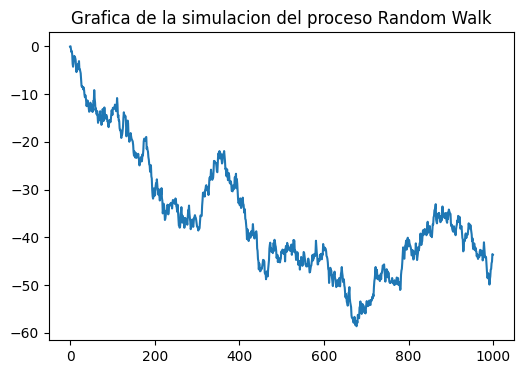

In [ ]:
plt.plot(random_walk)
plt.title("Grafica de la simulacion del proceso Random Walk")
plt.show()

In [ ]:
random_walk_acf_coef = acf(random_walk)
random_walk_acf_coef

array([1.        , 0.99302579, 0.98600992, 0.97921462, 0.97289477,
       0.96644273, 0.95994944, 0.95404171, 0.94817164, 0.94209898,
       0.93587322, 0.92968245, 0.92355987, 0.9171946 , 0.91116483,
       0.90577602, 0.90077881, 0.89551362, 0.89004607, 0.88460461,
       0.87880027, 0.8730321 , 0.86708885, 0.86185303, 0.85657295,
       0.85114979, 0.84564032, 0.84028773, 0.8351882 , 0.82993555,
       0.82480905])

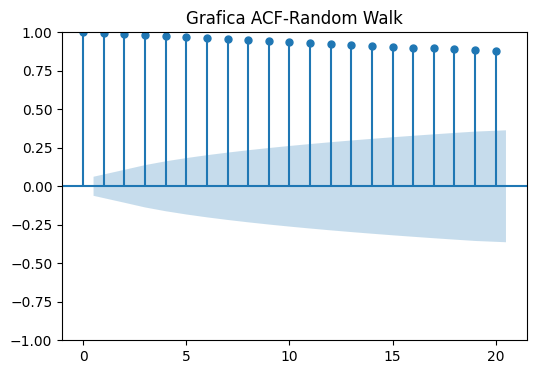

In [ ]:
plot_acf(random_walk, lags=20)
plt.title("Grafica ACF-Random Walk")
plt.show()

Como se visualiza un decrecimiento lineal, la serie es no estacionaria.

<body>
  <h1> Muchas gracias! 😀</h1>
</body>